In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# X: time series, Nchan x  NSamp

def S(I, X, N):
    dt = float(1./N)
    if len(I) == 1:
        return X[I[0], :] - X[I[0], 0]
    else:
        prev = S(I[0:-1], X, N)
        dgamma = np.gradient(X[I[-1], :])
        return np.cumsum(np.multiply(prev, dgamma)*1)
    

In [38]:
t = np.linspace(0, 1, 1000)
X = []
lags = np.pi*np.array([0, 1./8, 1./4, 3./8, 1./2])
for lag in lags:
    X.append(np.sin(-2*np.pi*t + lag))
X = np.vstack(X)
print(X.shape)


(5, 1000)


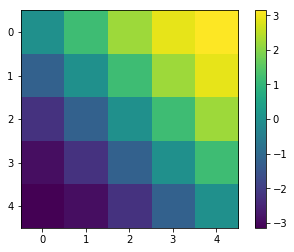

In [39]:
Amat = np.zeros((len(lags), len(lags)))
for ind1, lag1 in enumerate(lags):
    for ind2, lag2 in enumerate(lags):
        Sij = S([ind1, ind2], X, 1000)
        Sji = S([ind2, ind1], X, 1000)
        Aij = (1./2)*(Sij - Sji)[-1]
        Amat[ind1, ind2] = Aij
plt.imshow(Amat)
plt.colorbar()

In [23]:
S12 = S([0, 1], X, 1000)
S21 = S([1, 0], X, 1000)
A12 = (1/2.)*(S12 - S21)
A12[-1]

-0.0027206811090478757

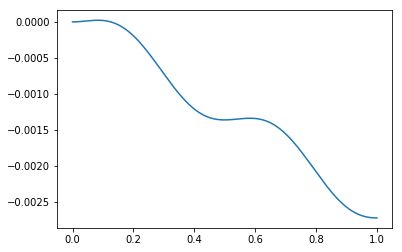

In [26]:
plt.plot(t, S([0, 1], X, 1000))